In [1]:
import pandas as pd

In [2]:
df =pd.read_csv("train.csv")

In [3]:
df.shape

(42000, 785)

In [4]:
df.head

<bound method NDFrame.head of        label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       pi

In [5]:
 df.sample ()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
7912,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
import matplotlib.pyplot as plt

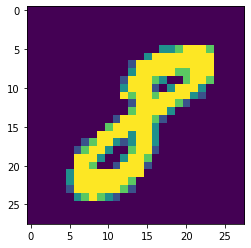

In [7]:
plt.imshow(df.iloc[20119,1:].values.reshape(28,28))

In [8]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
X_train.shape

(33600, 784)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
Knn =KNeighborsClassifier()

In [13]:
Knn.fit(X_train,y_train)

KNeighborsClassifier()

In [14]:
y_pred = Knn.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

In [16]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()

In [17]:
X_train=scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)

In [18]:
# pca
from sklearn.decomposition import PCA
pca =PCA(n_components=100)

In [19]:
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)


In [20]:
knn=KNeighborsClassifier()

In [21]:
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [22]:
y_pred =knn.predict(X_test_trf)

In [23]:
accuracy_score(y_test,y_pred)

0.9544047619047619

In [24]:
for i in range(1,785):
    pca =PCA(n_components=i)
    X_train_trf=pca.fit_transform(X_train)
    X_test_trf=pca.transform(X_test)
    knn=KNeighborsClassifier()
    knn.fit(X_train_trf,y_train)
    y_pred =knn.predict(X_test_trf)    
    print(accuracy_score(y_test,y_pred))

0.2580952380952381
0.3236904761904762
0.5104761904761905
0.6663095238095238
0.7378571428571429
0.8227380952380953
0.8436904761904762
0.8721428571428571
0.886547619047619
0.9055952380952381
0.9116666666666666
0.9184523809523809
0.9276190476190476
0.9351190476190476
0.9384523809523809
0.9379761904761905
0.9407142857142857
0.94
0.9425
0.9442857142857143
0.9438095238095238
0.9441666666666667
0.9442857142857143


KeyboardInterrupt: 

In [25]:
# transforming a 2D cordinate system
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [26]:
X_train_trf

array([[-2.71863253, -0.48982409],
       [-0.67698015, -6.75362491],
       [-3.03323281,  6.50981624],
       ...,
       [ 2.14883643,  0.78079444],
       [ 1.05957006,  0.94767312],
       [17.70258446,  1.96188185]])

In [29]:
!pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
import matplotlib.pyplot as pd


In [34]:
!pip install plotly


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


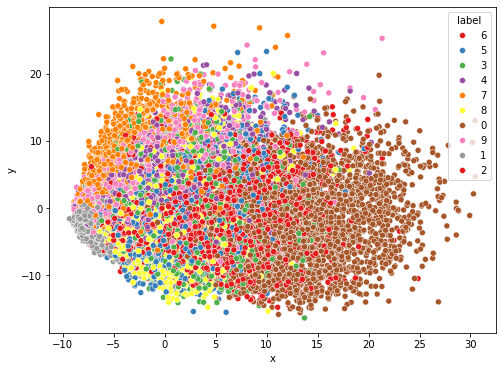

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming X_train_trf and y_train are numpy arrays
# Combine X_train_trf and y_train into a DataFrame for easy plotting
df = pd.DataFrame({
    'x': X_train_trf[:, 0],
    'y': X_train_trf[:, 1],
    'label': y_train.astype(str)  # Convert y_train to string for coloring
})

# Create a scatter plot using seaborn
plt.figure(figsize=(8,6))  # Optional: set the figure size
sns.scatterplot(x='x', y='y', hue='label', palette='Set1', data=df)

# Show the plot
plt.show()


In [36]:
# transforming a 3D cordinate system
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [37]:
X_train_trf

array([[-2.71863253, -0.48982409,  1.1354966 ],
       [-0.67698015, -6.75362491, -2.33590139],
       [-3.03323281,  6.50981624,  7.49182983],
       ...,
       [ 2.14883643,  0.78079444, -0.74738774],
       [ 1.05957006,  0.94767312,  3.94973114],
       [17.70258446,  1.96188185, -4.94352837]])

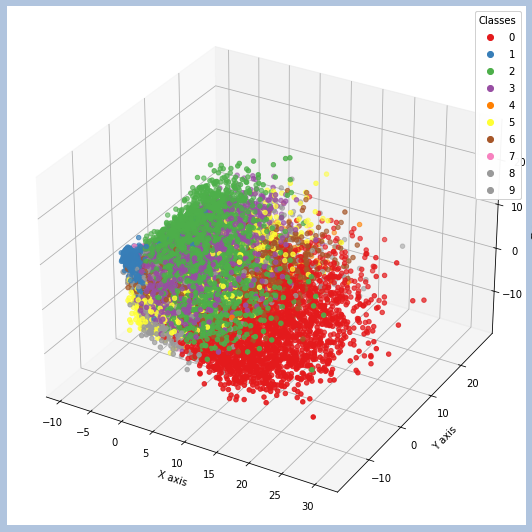

In [49]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd

# Assuming X_train_trf and y_train are numpy arrays
# Combine X_train_trf and y_train into a DataFrame for easy plotting
df = pd.DataFrame({
    'x': X_train_trf[:, 0],
    'y': X_train_trf[:, 1],
    'z': X_train_trf[:, 2],
    'label': y_train.astype(str)  # Convert y_train to string for coloring
})

# Set up the figure and 3D axes
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot using Matplotlib, color based on y_train
scatter = ax.scatter(df['x'], df['y'], df['z'], c=pd.Categorical(df['label']).codes, cmap='Set1')

# Add color bar
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)

# Set labels
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Set background color
fig.patch.set_facecolor('lightsteelblue')

# Adjust margins
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)

# Show plot
plt.show()


In [39]:
# eigan values
pca.explained_variance_

array([40.67111198, 29.17023401, 26.74459621])

In [40]:
# eigan vector
pca.components_

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [41]:
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [42]:
pca.explained_variance_

array([4.06711120e+01, 2.91702340e+01, 2.67445962e+01, 2.08534479e+01,
       1.81489188e+01, 1.58529825e+01, 1.38710810e+01, 1.24805897e+01,
       1.10279424e+01, 1.00958253e+01, 9.63317821e+00, 8.62785945e+00,
       8.06303131e+00, 7.89511749e+00, 7.44167929e+00, 7.17032873e+00,
       6.73266373e+00, 6.62744023e+00, 6.41499161e+00, 6.25808269e+00,
       5.90495742e+00, 5.76521585e+00, 5.52084601e+00, 5.32003847e+00,
       5.18309925e+00, 4.93439597e+00, 4.90652171e+00, 4.71800493e+00,
       4.49824444e+00, 4.43140305e+00, 4.32604521e+00, 4.23491831e+00,
       4.10335015e+00, 4.06731180e+00, 4.02362178e+00, 3.84130473e+00,
       3.81886146e+00, 3.71316498e+00, 3.60918108e+00, 3.47303214e+00,
       3.42842989e+00, 3.38841159e+00, 3.29157511e+00, 3.22927379e+00,
       3.21745142e+00, 3.15810372e+00, 3.12620905e+00, 3.10412385e+00,
       3.05892795e+00, 3.03728188e+00, 2.96540461e+00, 2.94033669e+00,
       2.86828564e+00, 2.82617865e+00, 2.80038441e+00, 2.77411221e+00,
      

In [43]:
pca.explained_variance_ratio_

array([5.78519225e-02, 4.14926968e-02, 3.80423901e-02, 2.96626277e-02,
       2.58156168e-02, 2.25498018e-02, 1.97306802e-02, 1.77527998e-02,
       1.56865066e-02, 1.43606328e-02, 1.37025484e-02, 1.22725500e-02,
       1.14691200e-02, 1.12302739e-02, 1.05852885e-02, 1.01993106e-02,
       9.57676152e-03, 9.42708817e-03, 9.12489429e-03, 8.90170190e-03,
       8.39940495e-03, 8.20063196e-03, 7.85303229e-03, 7.56739707e-03,
       7.37261022e-03, 7.01884653e-03, 6.97919728e-03, 6.71104483e-03,
       6.39845030e-03, 6.30337291e-03, 6.15350848e-03, 6.02388659e-03,
       5.83673972e-03, 5.78547759e-03, 5.72333148e-03, 5.46399774e-03,
       5.43207369e-03, 5.28172755e-03, 5.13381744e-03, 4.94015474e-03,
       4.87671103e-03, 4.81978768e-03, 4.68204430e-03, 4.59342487e-03,
       4.57660834e-03, 4.49219022e-03, 4.44682221e-03, 4.41540749e-03,
       4.35111936e-03, 4.32032928e-03, 4.21808870e-03, 4.18243127e-03,
       4.07994349e-03, 4.02004913e-03, 3.98335855e-03, 3.94598812e-03,
      

In [45]:
import numpy as np

In [46]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

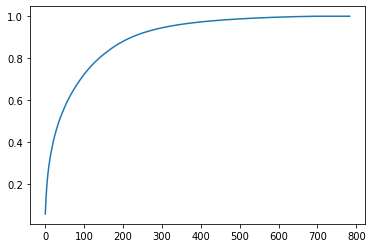

In [47]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))